In [4]:
import pandas as pd
dados = pd.read_csv('../files/emp_automovel.csv')

x = dados.drop('inadimplente', axis =1)
y = dados ['inadimplente']

In [5]:
dados

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


In [6]:
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier()
modelo.fit(x, y)
modelo.score(x, y)

1.0

In [7]:
print(f'Acurácia: {modelo.score(x, y)}')

Acurácia: 1.0


In [8]:
from sklearn.model_selection import train_test_split

x, x_teste, y, y_teste = train_test_split(x, y, test_size=0.15, stratify=y, random_state=5)

x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify=y, random_state=5)

In [9]:
modelo = DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)

DecisionTreeClassifier()

In [10]:
print(f'Acuracia de treino: {modelo.score(x_treino,y_treino)}')

print(f'Acuracia de validacao: {modelo.score(x_val,y_val)}')

Acuracia de treino: 1.0
Acuracia de validacao: 0.8467903492727115


In [11]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(x_treino, y_treino)

print(f'Acuracia de treino: {modelo.score(x_treino,y_treino)}')

print(f'Acuracia de validacao: {modelo.score(x_val,y_val)}')

Acuracia de treino: 0.9205574912891986
Acuracia de validacao: 0.9059315390645414


In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
y_previsto = modelo.predict(x_val)

matriz_confusao = confusion_matrix(y_val, y_previsto)

print(matriz_confusao)

[[10360   119]
 [  961    41]]


In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

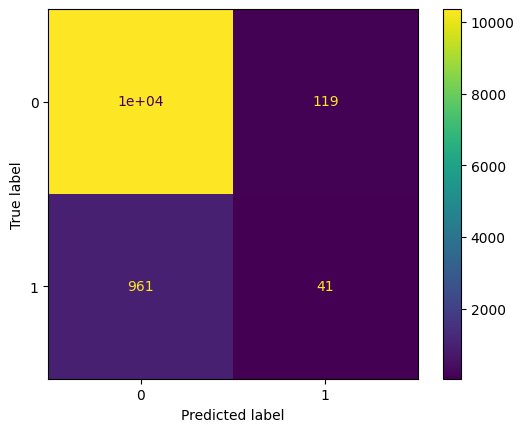

In [15]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao)

visualizacao.plot();

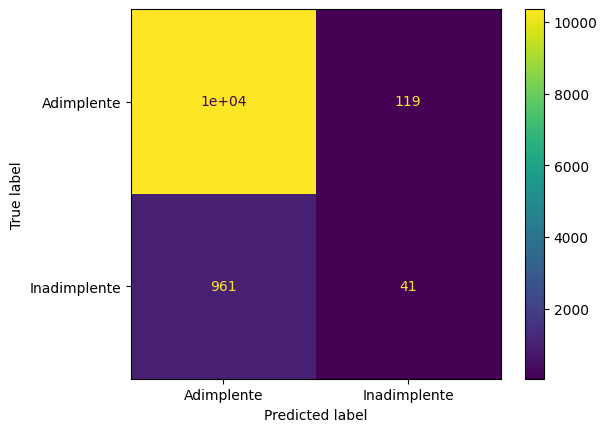

In [16]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['Adimplente','Inadimplente'])

visualizacao.plot();

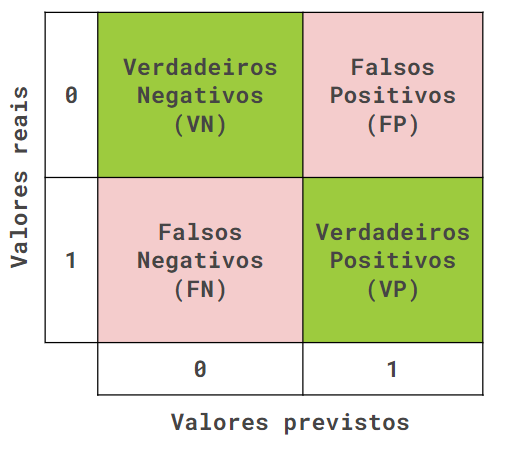

In [17]:
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(max_depth = 10)
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')



Acurácia de treino: 0.9153890824622531
Acurácia de validação: 0.9128995732079087


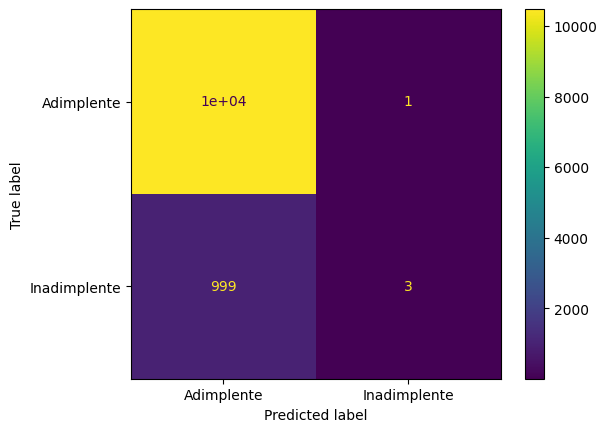

In [18]:
y_previsto = modelo.predict(x_val)
matriz_confusao = confusion_matrix(y_val, y_previsto)
visualizacao = ConfusionMatrixDisplay(confusion_matrix= matriz_confusao,
                                      display_labels = ['Adimplente', 'Inadimplente'])
visualizacao.plot();

In [19]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_val, y_previsto))

0.9128995732079087


In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(precision_score(y_val,y_previsto))

print(recall_score(y_val,y_previsto))

print(f1_score(y_val,y_previsto))

0.75
0.0029940119760479044
0.005964214711729622


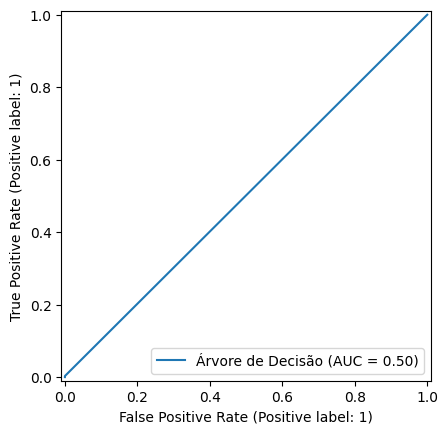

In [21]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de Decisão');

In [22]:
from sklearn.metrics import roc_auc_score
print(f'AUC: {roc_auc_score(y_val, y_previsto)}')

AUC: 0.5014492915114518


In [23]:
from sklearn.metrics import PrecisionRecallDisplay

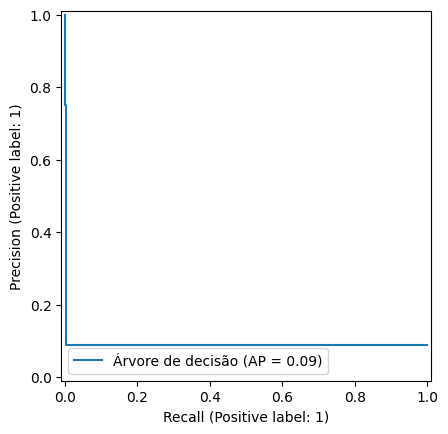

In [24]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de decisão');

In [25]:
from sklearn.metrics import average_precision_score

In [26]:
print(f'AP: {average_precision_score(y_val, y_previsto)}')

AP: 0.08925883534733513


In [27]:
from sklearn.metrics import classification_report

In [28]:
print(classification_report(y_val, y_previsto,digits=4))

              precision    recall  f1-score   support

           0     0.9130    0.9999    0.9545     10479
           1     0.7500    0.0030    0.0060      1002

    accuracy                         0.9129     11481
   macro avg     0.8315    0.5014    0.4802     11481
weighted avg     0.8987    0.9129    0.8717     11481



In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     10479
           1       0.75      0.00      0.01      1002

    accuracy                           0.91     11481
   macro avg       0.83      0.50      0.48     11481
weighted avg       0.90      0.91      0.87     11481



In [30]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [31]:
previsao_arvore = modelo.predict(x_val)

print(f'Acurácia (Decision Tree): {accuracy_score(y_val, previsao_arvore)}')
print(f'Recall (Decision Tree): {recall_score(y_val, previsao_arvore)}')
print(f'Precisão (Decision Tree): {precision_score(y_val, previsao_arvore)}')
print(f'F1_Score (Decision Tree): {f1_score(y_val, previsao_arvore)}')

Acurácia (Decision Tree): 0.9128995732079087
Recall (Decision Tree): 0.0029940119760479044
Precisão (Decision Tree): 0.75
F1_Score (Decision Tree): 0.005964214711729622


In [33]:
previsao_rf = modelo.predict(x_val)

print(f'Acurácia (Random Forest): {accuracy_score(y_val, previsao_rf)}')
print(f'Recall (Random Forest): {recall_score(y_val, previsao_rf)}')
print(f'Precisão (Random Forest): {precision_score(y_val, previsao_rf)}')
print(f'F1_Score (Random Forest): {f1_score(y_val, previsao_rf)}')

Acurácia (Random Forest): 0.9128995732079087
Recall (Random Forest): 0.0029940119760479044
Precisão (Random Forest): 0.75
F1_Score (Random Forest): 0.005964214711729622


In [34]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

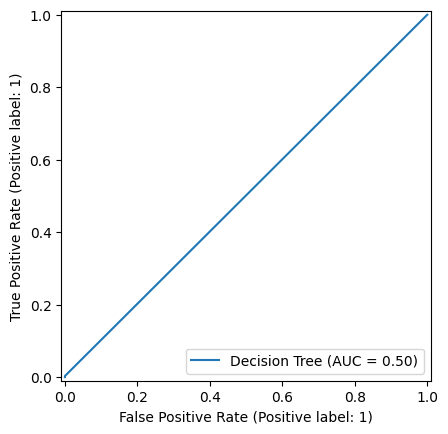

In [35]:
curva_roc = RocCurveDisplay.from_predictions(y_val, previsao_arvore, name = 'Decision Tree')


In [36]:
curva_roc = RocCurveDisplay.from_predictions(y_val, previsao_rf, name = 'Random Forest', ax = curva_roc.ax_)

In [37]:
print(f'AUC (Decision Tree): {roc_auc_score(y_val, previsao_arvore)}')
print(f'AUC (Random Forest): {roc_auc_score(y_val, previsao_rf)}')

AUC (Decision Tree): 0.5014492915114518
AUC (Random Forest): 0.5014492915114518


In [38]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

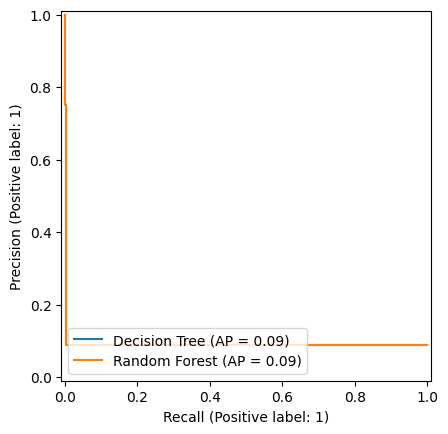

In [39]:
curva_precision_recall = PrecisionRecallDisplay.from_predictions(y_val, previsao_arvore, name = 'Decision Tree')
curva_precision_recall = PrecisionRecallDisplay.from_predictions(y_val, previsao_rf, name = 'Random Forest', ax = curva_precision_recall.ax_) 

In [40]:
print('Decision Tree')
print(classification_report(y_val, previsao_arvore))
print('Random Forest')
print(classification_report(y_val, previsao_rf))

Decision Tree
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     10479
           1       0.75      0.00      0.01      1002

    accuracy                           0.91     11481
   macro avg       0.83      0.50      0.48     11481
weighted avg       0.90      0.91      0.87     11481

Random Forest
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     10479
           1       0.75      0.00      0.01      1002

    accuracy                           0.91     11481
   macro avg       0.83      0.50      0.48     11481
weighted avg       0.90      0.91      0.87     11481

